In [37]:
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine
from tqdm import tqdm_notebook

from sources import parse_glove_vocab

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [39]:
pd.options.display.max_rows = 1000

In [40]:
m1 = KeyedVectors.load_word2vec_format('../data/corpora/north-south/new-england.w2v.txt')

In [41]:
m2 = KeyedVectors.load_word2vec_format('../data/corpora/north-south/deep-south.w2v.txt')

In [42]:
v1 = parse_glove_vocab('../data/corpora/north-south/new-england.vocab.txt')

In [43]:
v2 = parse_glove_vocab('../data/corpora/north-south/deep-south.vocab.txt')

In [44]:
v1_total = sum(v1.values())

In [45]:
v2_total = sum(v2.values())

In [46]:
vocab = parse_glove_vocab('../data/corpora/north-south/vocab.txt')

In [47]:
def neighbor_sim(m1, m2, token, topn=50):
    g1 = [t for t, _ in m1.most_similar(token, topn=topn)]
    g2 = [t for t, _ in m2.most_similar(token, topn=topn)]
    return m1.n_similarity(g1, g2)

In [48]:
def cross_avg_neighbor_sim(m1, m2, token, *args, **kwargs):
    sim1 = neighbor_sim(m1, m2, token, *args, **kwargs)
    sim2 = neighbor_sim(m2, m1, token, *args, **kwargs)
    return np.mean([sim1, sim2])

In [63]:
cross_avg_neighbor_sim(m1, m2, 'marriage')

0.91368834507294561

In [30]:
data = []
for token in tqdm_notebook(vocab.keys()):
    
    sim = cross_avg_neighbor_sim(m1, m2, token)
    
    c1 = v1[token] / v1_total
    c2 = v2[token] / v2_total

    cr = min([c1, c2]) / max([c1, c2])
    
    data.append((token, v1[token], v2[token], cr, sim))

HBox(children=(IntProgress(value=0, max=8104), HTML(value='')))

In [31]:
df = pd.DataFrame(data, columns=('token', 'c1', 'c2', 'cr', 'score'))

In [66]:
df[df['cr'] > 0.9].sort_values('score').head(200)

,token,c1,c2,cr,score
4244,stopping,3190,3822,0.909500,-0.123047
1820,sec,9022,11032,0.928226,0.152985
507,future,35620,43960,0.936842,0.251486
1444,heat,11029,15489,0.938016,0.266936
2383,labor,6305,8387,0.990321,0.287203
6827,labels,1520,2078,0.963597,0.338213
3335,spin,4036,5686,0.935065,0.344450
786,act,22155,28722,0.984114,0.359153
2975,flat,4678,6600,0.933714,0.387687
1691,period,9011,13044,0.910038,0.398113


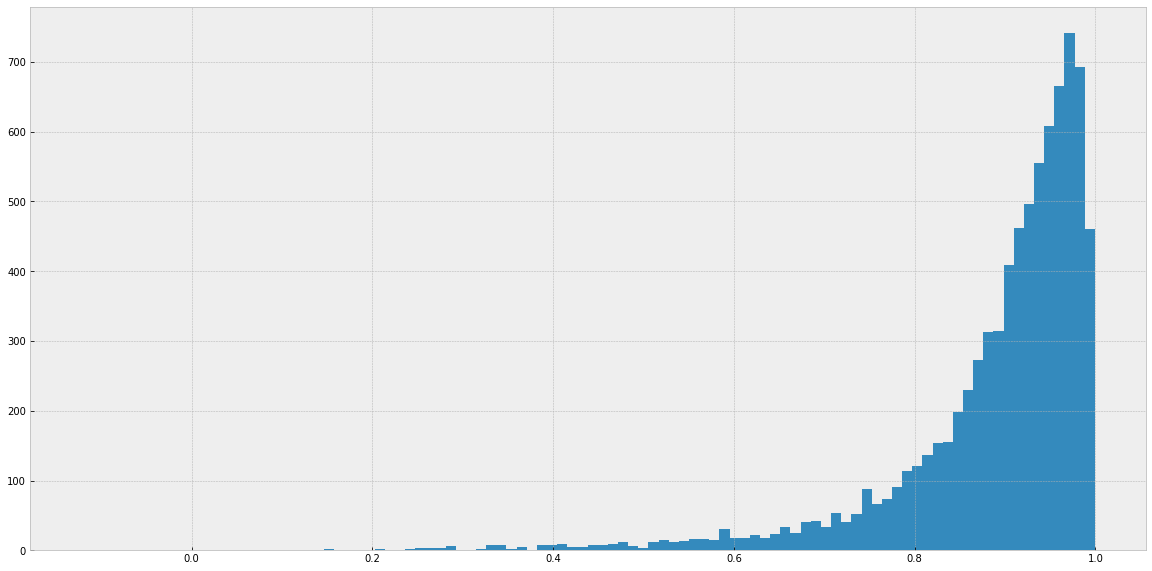

In [81]:
plt.figure(figsize=(20, 10))
_ = plt.hist(df['score'], bins=100)

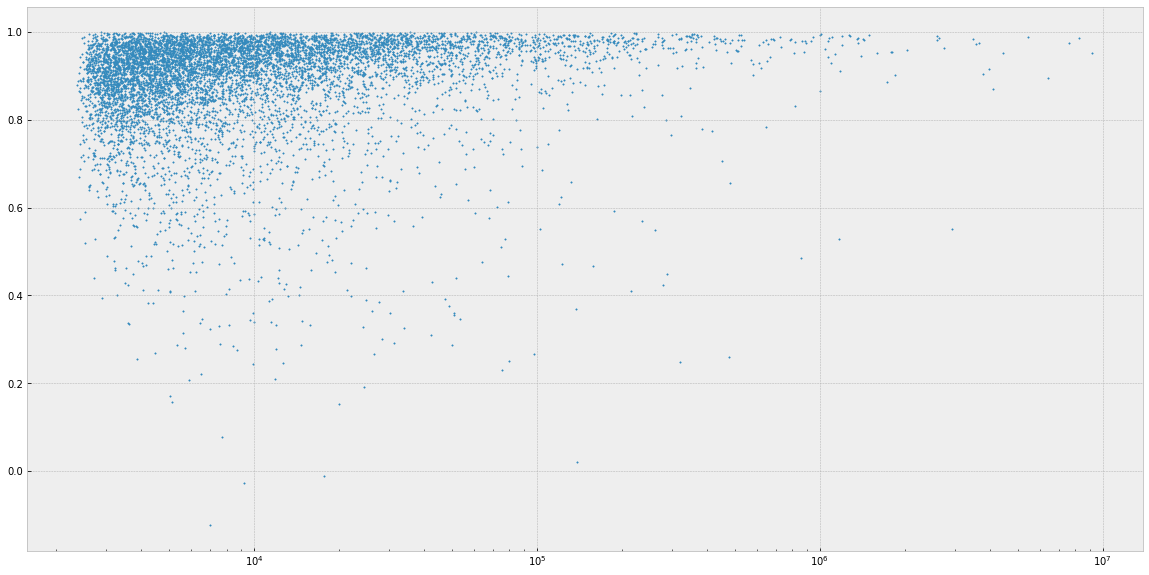

In [67]:
plt.figure(figsize=(20, 10))
plt.xscale('log')
plt.scatter(df['count'], df['score'], s=2)